In [1]:
using FileIO
using PyPlot
using LaTeXStrings
using MixedLayerModel

In [9]:
path = "../experiments/output/";
out400 = load(path*"co2_400.jld2");

co2_vals = [500,600,700,800];
exps = path*"co2_upstep_".*string.(co2_vals).*".jld2";
exps_fixSST = path*"co2_upstep_fixSST_".*string.(co2_vals).*".jld2";

out = load.(exps);
out_fixSST = load.(exps_fixSST);

p = basic_params();

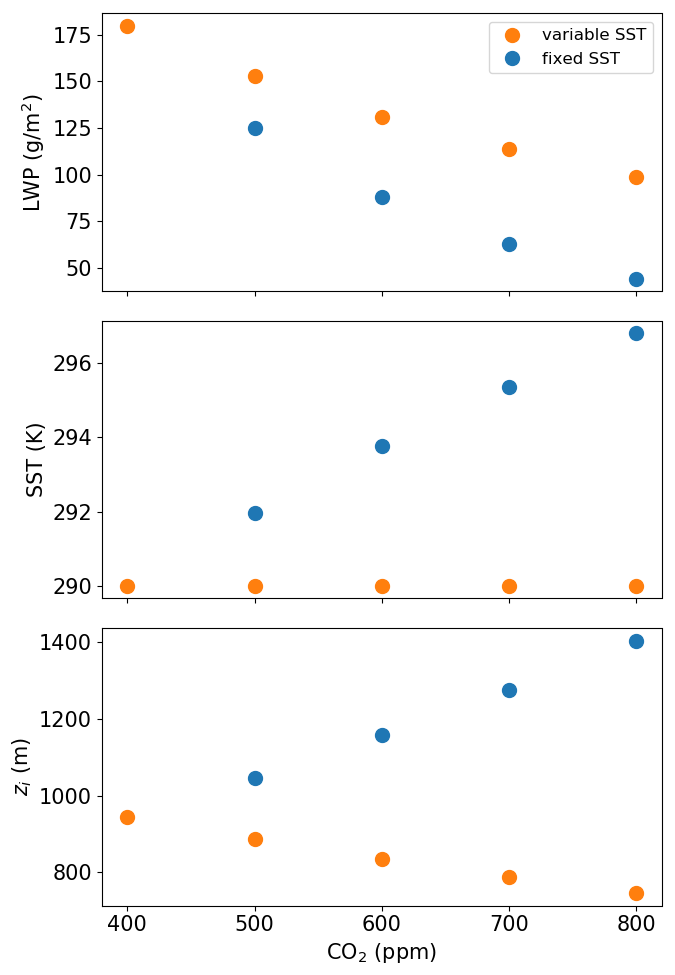

In [33]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
rcParams["font.size"] = 15;

fig, axes = subplots(3,1, figsize=(7,10), sharex=true);
ax1, ax2, ax3 = axes;

u = out400["uf"];
zi, hM, qM, SST = u;
lwp = calc_LWP(zi, hM, qM) * 1000;
ax1.plot(400.0, lwp, "o", color="C1", markersize=10.0)
ax2.plot(400.0, SST, "o", color="C1", markersize=10.0)
ax3.plot(400.0, zi, "o", color="C1", markersize=10.0)

for (i,o) in enumerate(out)  
    u = o["uf"];
    co2i = co2_vals[i];
    zi, hM, qM, SST = u;
    lwp = calc_LWP(zi, hM, qM) * 1000;
    ax1.plot(co2i, lwp, "o", color="C0", markersize=10.0)
    ax2.plot(co2i, SST, "o", color="C0", markersize=10.0)
    ax3.plot(co2i, zi, "o", color="C0", markersize=10.0)
    
    u = out_fixSST[i]["uf"];
    co2i = co2_vals[i];
    zi, hM, qM, SST = u;
    lwp = calc_LWP(zi, hM, qM) * 1000;
    ax1.plot(co2i, lwp, "o", color="C1", markersize=10.0)
    ax2.plot(co2i, SST, "o", color="C1", markersize=10.0)
    ax3.plot(co2i, zi, "o", color="C1", markersize=10.0)
end

ax3.set_xlabel(L"CO$_2$ (ppm)"); 
ax1.set_ylabel(L"LWP (g/m$^2$)"); ax2.set_ylabel("SST (K)"); ax3.set_ylabel(L"$z_i$ (m)");
tight_layout();
ax1.legend(["variable SST","fixed SST"], fontsize=12);
savefig("./figures/lwp_sst_zi_co2.png",dpi=400);
show();

In [ ]:
function profile(u, maxz)
    zi, hM, qM, SST = u;
    
    stepz = 1.0;
    z1 = collect(0:stepz:zi); z2 = collect(zi:stepz:maxz);
    z = [z1;z2];
    
    h = [hM .* ones(length(z1)); h_ft(z2, p)];
    qt = [qM .* ones(length(z1)); q_ft(z2, p)];
    
    θ = theta(z,h,qt); # K
    
    T = temp.(z,h,qt);
    ql = q_l(z,T,qt) * 1000.0; # kg/kg -> g/kg
    
    return z, θ, ql 
end

In [ ]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
rcParams["font.size"] = 15;

fig1 = figure(figsize=(10,8));
ax1 = subplot(121);
ax2 = subplot(122);

exps = [out400, out500, out600, out700, out800];
co2 = [400, 500, 600, 700, 800];
maxz = 2000;

for (i,o) in enumerate(exps)
    u = o["uf"];
    z, θ, ql = profile(u, maxz)
    ax1.plot(θ, z)
    ax2.plot(ql, z, label=string(co2[i])*" ppm")
end

ax1.set_ylim([0,maxz]); ax2.set_ylim([0,maxz]);
ax1.set_ylabel("z (m)");
ax1.set_xlabel("θ (K)"); ax2.set_xlabel("ql (g/kg)");
legend();
tight_layout();
show()